In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data_path = "./Dataset/Train"
categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "Nothing", "Space"]
classes = len(categories)

w = 299
h = 299

x = []
t = []
count = 100

for i, j in enumerate(categories):
    
    # One-hot Encoding
    label = [0 for k in range(classes)]
    label[i] = 1
    
    img_path = data_path + "/" + j
    files = glob.glob(img_path + "/*.jpg")[:count]
    print(j, "파일 길이 : ", len(files))
    
    # 이미지 전처리
    for k, f in enumerate(files):
  
        img = Image.open(f)
        img = img.convert("RGB")   # RGB 채널로 변환
        img = img.resize((w, h))   # 이미지 크기 조정
        data = np.asarray(img)   # numpy 배열로 변환
        x.append(data)
        t.append(label)
          
x = np.array(x)
t = np.array(t)

print('데이터 준비 및 전처리 완료!')

A 파일 길이 :  100
B 파일 길이 :  100
C 파일 길이 :  100
D 파일 길이 :  100
E 파일 길이 :  100
F 파일 길이 :  100
G 파일 길이 :  100
H 파일 길이 :  100
I 파일 길이 :  100
J 파일 길이 :  100
K 파일 길이 :  100
L 파일 길이 :  100
M 파일 길이 :  100
N 파일 길이 :  100
O 파일 길이 :  100
P 파일 길이 :  100
Q 파일 길이 :  100
R 파일 길이 :  100
S 파일 길이 :  100
T 파일 길이 :  100
U 파일 길이 :  100
V 파일 길이 :  100
W 파일 길이 :  100
X 파일 길이 :  100
Y 파일 길이 :  100
Z 파일 길이 :  100
Nothing 파일 길이 :  100
Space 파일 길이 :  100
데이터 준비 및 전처리 완료!


In [3]:
print(type(x))
print(type(t))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t)
dataset_numpy = (x_train, x_test, t_train, t_test)

In [5]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(2100, 299, 299, 3)
(2100, 28)
(700, 299, 299, 3)
(700, 28)


In [6]:
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(299, 299, 3))

In [7]:
# 추가적인 레이어 생성
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(150, activation='relu')(x)
predictions = Dense(28, activation='softmax')(x)

In [8]:
# 전체 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

In [9]:
# 모델 컴파일
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [10]:
# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [11]:
# 모델 학습
model.fit(x_train, t_train, batch_size=32, epochs=10, validation_data=(x_test, t_test), callbacks=[early_stopping])

Epoch 1/10
66/66 [==============================] - 477s 7s/step - loss: 0.4327 - accuracy: 0.8919 - val_loss: 135.7422 - val_accuracy: 0.0329
Epoch 2/10
66/66 [==============================] - 461s 7s/step - loss: 0.1649 - accuracy: 0.9576 - val_loss: 17.8021 - val_accuracy: 0.1929
Epoch 3/10
66/66 [==============================] - 461s 7s/step - loss: 0.0683 - accuracy: 0.9824 - val_loss: 6.2828 - val_accuracy: 0.4900
Epoch 4/10
66/66 [==============================] - 461s 7s/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.9955 - val_accuracy: 0.9171
Epoch 5/10
66/66 [==============================] - 461s 7s/step - loss: 0.0873 - accuracy: 0.9814 - val_loss: 6.2226 - val_accuracy: 0.1371
Epoch 6/10
66/66 [==============================] - 461s 7s/step - loss: 0.0511 - accuracy: 0.9862 - val_loss: 6.3711 - val_accuracy: 0.3286
Epoch 7/10
66/66 [==============================] - 462s 7s/step - loss: 0.0921 - accuracy: 0.9771 - val_loss: 3.3845 - val_accuracy: 0.4357


In [13]:
# 모델 평가
loss, accuracy = model.evaluate(x_test, t_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

22/22 [==============================] - 27s 1s/step - loss: 0.9955 - accuracy: 0.9171
Test Loss: 0.9955024719238281
Test Accuracy: 0.9171428680419922


1/1 [==============================] - 0s 81ms/step
분류 : D/ 정답 : D


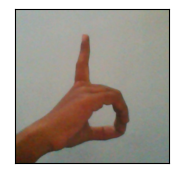

1/1 [==============================] - 0s 80ms/step
분류 : S/ 정답 : S


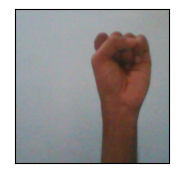

1/1 [==============================] - 0s 84ms/step
분류 : C/ 정답 : C


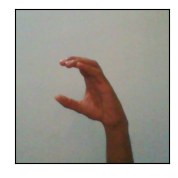

1/1 [==============================] - 0s 85ms/step
분류 : S/ 정답 : S


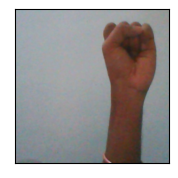

1/1 [==============================] - 0s 79ms/step
분류 : Q/ 정답 : Q


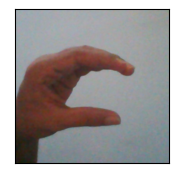

1/1 [==============================] - 0s 80ms/step
분류 : L/ 정답 : L


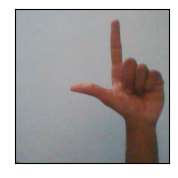

1/1 [==============================] - 0s 79ms/step
분류 : C/ 정답 : C


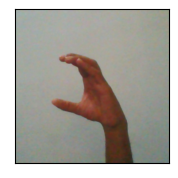

1/1 [==============================] - 0s 80ms/step
분류 : G/ 정답 : J


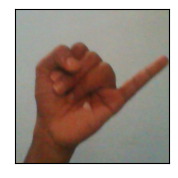

1/1 [==============================] - 0s 78ms/step
분류 : B/ 정답 : B


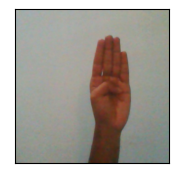

1/1 [==============================] - 0s 68ms/step
분류 : R/ 정답 : R


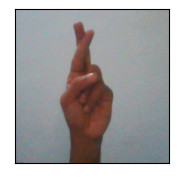

In [14]:
categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "Nothing", "Space"]

width = 299
height = 299
channel = 3

for i in range(10, 20):
    plt.figure(figsize = (2, 2))
    
    output = model.predict(x_test[i].reshape(1, width, height, channel))
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape(width, height, channel), cmap = 'gray')
    
    print('분류 : ' + categories[np.argmax(output)] + '/ 정답 : ' + categories[np.argmax(t_test[i])])
    plt.show()